<a href="https://colab.research.google.com/github/leidysguerrero120/Trabajo-Anal-tica-3---Marketing/blob/main/Modelos_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
pip install pandas plotly


In [51]:
import numpy as np
import pandas as pd
import sqlite3
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interact
from sklearn import neighbors
import joblib
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

cur = conn.cursor()

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()

for table in tables:
    print(table[0])

ratings
movies
usuarios_sel
movies_sel
ratings_final
movies_final
full_ratings


***Sistemas basados en popularidad***

In [21]:
import plotly.express as px
import pandas as pd

###Obtener las 10 películas mejor calificadas
query = """
SELECT movie_title,
       AVG(rating) AS avg_rat,
       COUNT(*) AS w_num
FROM full_ratings
WHERE rating <> 0
GROUP BY movie_title
ORDER BY avg_rat DESC
LIMIT 10
"""
top_movies = pd.read_sql(query, conn)

fig = px.bar(
    top_movies,
    x='avg_rat',
    y='movie_title',
    orientation='h',
    color='avg_rat',
    title='Top 10 películas mejor calificadas',
    labels={'avg_rat': 'Calificación Promedio', 'movie_title': 'Película'},
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
    ),
    yaxis=dict(
        categoryorder='total ascending',
    ),
    title_font=dict(size=24, family='Arial', color='darkblue'),
    font=dict(family='Arial', size=12, color='black'),
)

fig.show()


La película **The Shawshank Redemption (1994)** destaca con un promedio de calificación de 4.44 y 219 calificaciones. Su narrativa sobre la esperanza y la redención la ha consolidado como un clásico atemporal, resonando profundamente en la audiencia a lo largo del tiempo.

In [24]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')


query = """
SELECT movie_title,
       AVG(CASE WHEN rating = 0 THEN NULL ELSE rating END) AS avg_rat,
       COUNT(*) AS w_num
FROM full_ratings
GROUP BY movie_title
ORDER BY w_num DESC
LIMIT 10
"""


result = pd.read_sql(query, conn)


fig = px.bar(
    result,
    x='w_num',
    y='movie_title',
    title='Top 10 Películas Más Vistas',
    labels={'w_num': 'Número de Calificaciones', 'movie_title': 'Título de la Película'},
    text='avg_rat',
    color='avg_rat',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Número de Calificaciones',
    yaxis_title='Título de la Película',
    template='plotly_white',
    title_x=0.5
)

fig.show()

conn.close()


**Forrest Gump (1994)** es la película con más calificaciones en la base de datos, lo que indica que es una de las más populares o vistas. Sin embargo, a pesar de su popularidad, su promedio de calificación es **4.12**, que no es lo suficientemente alto para aparecer entre las **mejor calificadas** en el top 10. Esto sugiere que, aunque muchas personas la han visto y calificado, las opiniones sobre ella varían más en comparación con las películas mejor calificadas que alcanzaron promedios más altos.

Esto quiere decir, que el gran número de calificaciones refleja popularidad, pero su promedio indica que no tiene la mejor valoración entre todos los usuarios. Esto destaca que una película puede ser muy vista, pero no necesariamente estar entre las mejor valoradas.

In [45]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

query = """
SELECT year,
       movie_title,
       AVG(rating) AS avg_rating
FROM full_ratings
GROUP BY year, movie_title
ORDER BY year DESC, avg_rating DESC
"""

best_movies_by_year = pd.read_sql(query, conn)

print(best_movies_by_year)

conn.close()

     year                             movie_title  avg_rating
0    2016                         Deadpool (2016)    3.755556
1    2014          Guardians of the Galaxy (2014)    4.039216
2    2014                     Interstellar (2014)    3.885965
3    2014        Grand Budapest Hotel, The (2014)    3.775510
4    2013         Wolf of Wall Street, The (2013)    3.847826
..    ...                                     ...         ...
431  1941                     Citizen Kane (1941)    4.030303
432  1940                         Fantasia (1940)    3.770833
433  1940                        Pinocchio (1940)    3.410714
434  1939                Wizard of Oz, The (1939)    3.886364
435  1937  Snow White and the Seven Dwarfs (1937)    3.605634

[436 rows x 3 columns]


In [42]:
best_movies_by_year['decade'] = (best_movies_by_year['year'] // 10) * 10

decade_avg = best_movies_by_year.groupby('decade')['avg_rating'].mean().reset_index()

fig = px.bar(
    decade_avg,
    x='decade',
    y='avg_rating',
    title='Promedio de Calificación de Películas por Década',
    labels={'avg_rating': 'Promedio de Calificación', 'decade': 'Década'},
    color='avg_rating',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()


Al analizar las calificaciones promedio de las películas a través de los años, se observa un contraste interesante entre **Deadpool** (2016) y **Snow White and the Seven Dwarfs** (1937). A pesar de ser la película más reciente, **Deadpool** solo alcanzó un promedio de calificación de **3.71**, lo que indica que, aunque popular, no fue tan bien valorada por los críticos o el público. Por otro lado, **Snow White and the Seven Dwarfs**, a pesar de su antigüedad y su estatus como clásico, presenta un promedio aún más bajo de **3.60**.

Esto plantea preguntas sobre la evolución de los gustos del público a lo largo del tiempo y cómo las expectativas cambian en relación a las producciones cinematográficas. Mientras que **Deadpool** logró una gran aceptación en taquilla, su calificación sugiere que su contenido podría no haber resonado con todos los críticos. En contraste, la película de 1937, considerada pionera en la animación, podría ser apreciada por su innovación más que por su calidad en comparación con estándares contemporáneos.

Este análisis resalta la complejidad de las calificaciones en la industria del cine, donde la popularidad no siempre se traduce en una alta valoración crítica.

***Sistema de recomendación basado en contenido de un solo producto***

Información inicial del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     436 non-null    int64 
 1   movie_title  436 non-null    object
 2   genres       436 non-null    object
 3   year         436 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 13.8+ KB
None

Resumen de los datos:
            movie_id         year
count     436.000000   436.000000
mean    10610.655963  1993.770642
std     22519.300022    12.604420
min         1.000000  1937.000000
25%       726.750000  1990.000000
50%      1998.500000  1996.000000
75%      4888.500000  2001.000000
max    122904.000000  2016.000000

Información después de cambiar el tipo de 'year':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  

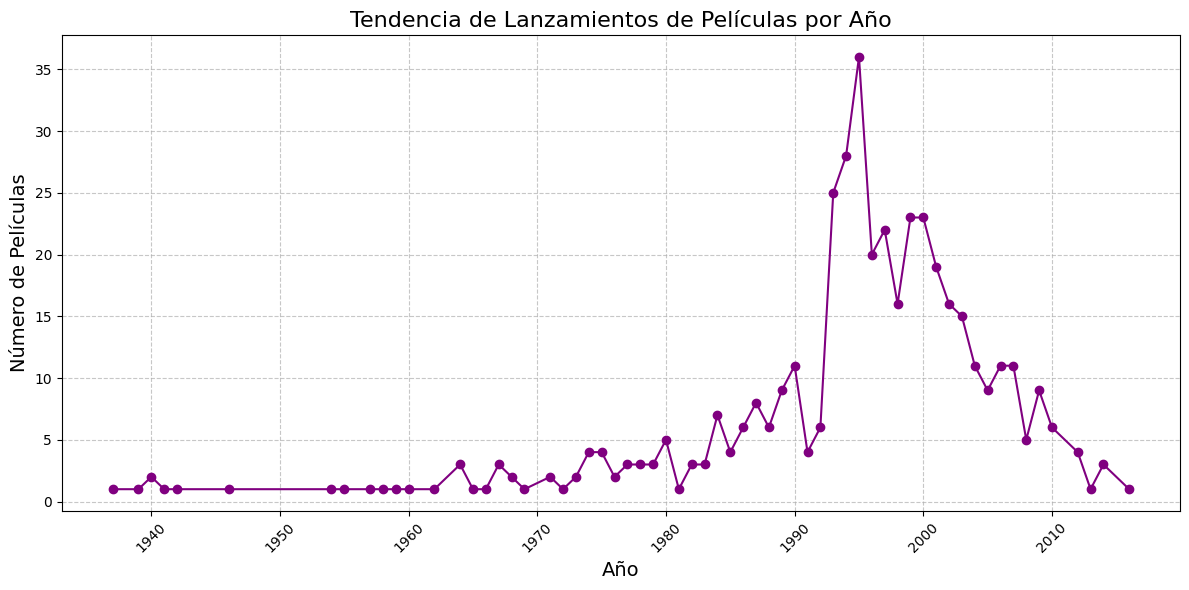

In [55]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

query = 'SELECT * FROM movies_final'
movies = pd.read_sql(query, conn)

print("Información inicial del DataFrame:")
print(movies.info())
print("\nResumen de los datos:")
print(movies.describe())

movies['year'] = movies['year'].astype('int')

print("\nInformación después de cambiar el tipo de 'year':")
print(movies.info())

movies_per_year = movies['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='purple')
plt.title('Tendencia de Lanzamientos de Películas por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Películas', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()


In [72]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')
cursor = conn.cursor()
movies = pd.read_sql('SELECT * FROM movies', conn)


def split_genres(genre_string):
    if pd.isnull(genre_string):
        return []
    if '|' in genre_string:
        return genre_string.split('|')
    else:
        return [genre_string]

movies['genre_list'] = movies['genres'].apply(split_genres)

cursor.execute("PRAGMA table_info(movies)")
columns = cursor.fetchall()
column_names = [column[1] for column in columns]
if 'genre_list' not in column_names:
    cursor.execute("ALTER TABLE movies ADD COLUMN genre_list TEXT")

conn.commit()
conn.close()

print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995   
1                   Adventure|Children|Fantasy  1995   
2                               Comedy|Romance  1995   
3                         Comedy|Drama|Romance  1995   
4                                       Comedy  1995   

                                          genre_list  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  


In [63]:
nan_count = movies.isna().sum()
print(nan_count)

movieId       0
title         0
genres        0
year          0
genre_list    0
dtype: int64


In [76]:
sc=MinMaxScaler()
movies[["year_sc"]]=sc.fit_transform(movies[['year']])

In [78]:
movies_dum1 = movies['genre_list'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0)

movies_dum2 = pd.concat([movies.drop(columns=['movieId', 'year', 'title', 'genres', 'genre_list']), movies_dum1], axis=1)

movies_dum2.to_csv('movies_dummies.csv', index=False)

print(movies_dum2.shape)

(9742, 21)


In [79]:
movies_dum2.head()

,year_sc,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,0.988603,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.988603,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.988603,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.988603,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.988603,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

query = 'SELECT * FROM movies_final'
movies = pd.read_sql(query, conn)

conn.close()

print("Columnas en el DataFrame:")
print(movies.columns)

if 'movie_title' in movies.columns:
    # Obtener una muestra aleatoria de 5 películas
    sample_movies = movies.sample(5)

    print("\nMuestra de películas:")
    for title in sample_movies['movie_title']:
        print(f"- {title}")
else:
    print("La columna 'movie_title' no se encuentra en el DataFrame.")


Columnas en el DataFrame:
Index(['movie_id', 'movie_title', 'genres', 'year'], dtype='object')

Muestra de películas:
- Ferris Bueller's Day Off (1986)
- Matrix, The (1999)
- Jurassic Park (1993)
- Hunt for Red October, The (1990)
- Philadelphia (1993)


In [96]:
### Ahora miremos un ejemplo con la película 'Matrix, The (1999)' para ver las recomendaciones similares
titulo_pelicula = 'Matrix, The (1999)'

if titulo_pelicula in movies['movie_title'].values:
    ind_pelicula = movies[movies['movie_title'] == titulo_pelicula].index.values[0]

    similares_peliculas = movies_dum2.corrwith(movies_dum2.iloc[ind_pelicula, :], axis=1)

    similares_peliculas = similares_peliculas.sort_values(ascending=False)

    top_similares_peliculas = similares_peliculas.head(15).to_frame(name="correlación")

    top_similares_peliculas['movie_title'] = movies['movie_title']

    top_similares_peliculas = top_similares_peliculas.reset_index(drop=True)

    print("🎬 Las 15 películas recomendadas similares a '{}':".format(titulo_pelicula))
    print(top_similares_peliculas[['movie_title', 'correlación']])
else:
    print("❌ La película '{}' no está en la base de datos.".format(titulo_pelicula))


🎬 Las 15 películas recomendadas similares a 'Matrix, The (1999)':
                     movie_title  correlación
0     Breakfast Club, The (1985)          1.0
1      American History X (1998)          1.0
2           Love Actually (2003)          1.0
3                            NaN          1.0
4             Matrix, The (1999)          1.0
5                Election (1999)          1.0
6   Bridget Jones's Diary (2001)          1.0
7                            NaN          1.0
8                            NaN          1.0
9              Spider-Man (2002)          1.0
10                   Juno (2007)          1.0
11      Full Metal Jacket (1987)          1.0
12            Chicken Run (2000)          1.0
13                  Alien (1979)          1.0
14        Johnny Mnemonic (1995)          1.0


***Sistema de recomendación basado en contenido KNN ***

In [108]:
##### cargar dataframe escalado y con dummies ###
#movies_dum2= joblib.load('salidas_bmovies_dum2.joblib')
movies_dum2=pd.read_csv('/content/drive/MyDrive/moviesdummies_.csv')

In [143]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

try:
    usuarios = pd.read_sql('SELECT DISTINCT user_id AS user_id FROM ratings_final', conn)
    print(usuarios)

    user_id = 1

except sqlite3.Error as e:
    print(f"Error al conectar a la base de datos: {e}")

finally:
    if conn:
        conn.close()

     user_id
0          1
1          4
2          6
3          7
4         10
..       ...
373      605
374      606
375      607
376      608
377      610

[378 rows x 1 columns]


In [146]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

def recomendar(user_id):
    try:
        ratings = pd.read_sql('SELECT * FROM ratings_final WHERE user_id = :user', conn, params={'user': user_id})

        if ratings.empty:
            print(f"No se encontraron ratings para el usuario ID: {user_id}")
            return None

        l_movies_w = ratings['movie_id'].to_numpy()


        print(f"Películas ratings por el usuario {user_id}: {l_movies_w}")

        return l_movies_w

    except sqlite3.Error as e:
        print(f"Error al consultar la base de datos: {e}")

    finally:
        if conn:
            conn.close()  #

user_id = 1
recomendaciones = recomendar(user_id)


Películas ratings por el usuario 1: [   1    3    6   47   50   70  110  163  223  231  235  260  296  316
  349  356  367  457  480  500  527  552  553  590  592  593  596  608
  648  673  733  736  780  919  923 1073 1080 1089 1090 1097 1127 1136
 1196 1197 1198 1206 1208 1210 1213 1214 1219 1220 1222 1240 1258 1265
 1270 1278 1282 1291 1377 1500 1517 1552 1573 1580 1617 1625 1676 1732
 1777 1954 2000 2005 2012 2028 2054 2078 2115 2174 2268 2291 2329 2353
 2395 2406 2470 2502 2529 2542 2571 2617 2628 2640 2657 2692 2700 2716
 2797 2858 2916 2947 2959 2985 2987 2997 3033 3052 3147 3253 3489 3527
 3578 3671 3793]


In [149]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')  # Asegúrate de que el nombre de la base de datos sea correcto
cursor = conn.cursor()

try:
    ratings = pd.read_sql('SELECT * FROM ratings', conn)
    print("Datos cargados de la tabla 'ratings' con éxito.")

    if ratings.empty:
        print("La tabla 'ratings' está vacía.")
    else:
        print(f"Se han cargado {len(ratings)} registros de ratings.")

    cursor.execute("DROP TABLE IF EXISTS l_movies_w")

    consulta_sql = """
    CREATE TABLE l_movies_w AS
    SELECT DISTINCT movieId AS movie_id FROM ratings;  -- Usar DISTINCT para evitar duplicados
    """
    cursor.execute(consulta_sql)
    print("Tabla 'l_movies_w' creada con éxito.")

    l_movies_w = pd.read_sql('SELECT * FROM l_movies_w', conn)
    print("Datos de 'l_movies_w' cargados con éxito.")

    print(l_movies_w.head())

except sqlite3.Error as e:
    print(f"Error al operar con la base de datos: {e}")

finally:
    if conn:
        conn.close()
        print()


Datos cargados de la tabla 'ratings' con éxito.
Se han cargado 100836 registros de ratings.
Tabla 'l_movies_w' creada con éxito.
Datos de 'l_movies_w' cargados con éxito.
   movie_id
0         1
1         3
2         6
3        47
4        50



In [151]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

try:
    movies = pd.read_sql('SELECT * FROM movies', conn)
    print("Datos cargados de la tabla 'movies' con éxito.")

    if movies.empty:
        print("La tabla 'movies' está vacía.")
    else:
        print(f"Se han cargado {len(movies)} registros de movies.")

    if 'movies_dum2' not in locals():
        movies_dum2 = pd.DataFrame()

    movies_dum2['movie_id'] = movies['movieId']
    movies_dum2['title'] = movies['title']

    print("Columnas 'movie_id' y 'title' agregadas a movies_dum2.")
    print(movies_dum2.head())

except sqlite3.Error as e:
    print(f"Error al operar con la base de datos: {e}")

finally:
    if conn:
        conn.close()
        print()


Datos cargados de la tabla 'movies' con éxito.
Se han cargado 9742 registros de movies.
Columnas 'movie_id' y 'title' agregadas a movies_dum2.
    year_sc  Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  \
0  0.988603        1.0        1.0       1.0     1.0      1.0      0.0    0.0   
1  0.988603        1.0        0.0       1.0     0.0      1.0      0.0    0.0   
2  0.988603        0.0        0.0       0.0     1.0      0.0      1.0    0.0   
3  0.988603        0.0        0.0       0.0     1.0      0.0      1.0    1.0   
4  0.988603        0.0        0.0       0.0     1.0      0.0      0.0    0.0   

   Action  Crime  ...  Musical  Documentary  IMAX  Western  Film-Noir  \
0     0.0    0.0  ...      0.0          0.0   0.0      0.0        0.0   
1     0.0    0.0  ...      0.0          0.0   0.0      0.0        0.0   
2     0.0    0.0  ...      0.0          0.0   0.0      0.0        0.0   
3     0.0    0.0  ...      0.0          0.0   0.0      0.0        0.0   
4     0.0  

In [153]:
if 'l_movies_w' in locals():
    duplicates_count = l_movies_w['movie_id'].duplicated().sum()

    if duplicates_count == 0:
        print("No hay valores duplicados en la columna 'movie_id' de l_movies_w.")
    else:
        print(f"Se encontraron {duplicates_count} valores duplicados en la columna 'movie_id' de l_movies_w.")
else:
    print()


No hay valores duplicados en la columna 'movie_id' de l_movies_w.


In [155]:
l_movies_w = l_movies_w.drop_duplicates(subset=['movie_id'])

duplicates_count_after_removal = l_movies_w['movie_id'].duplicated().sum()

if duplicates_count_after_removal == 0:
    print("Se eliminaron los valores duplicados con éxito.")
else:
    print()


Se eliminaron los valores duplicados con éxito.


In [156]:
print(l_movies_w.shape)

(9724, 1)


In [157]:
l_movies_w.head(10)

,movie_id
0,1
1,3
2,6
3,47
4,50
5,70
6,101
7,110
8,151
9,157


In [158]:
l_movies_w.dtypes

,0
movie_id,int64


In [159]:
l_movies_w.isnull().sum()

,0
movie_id,0


In [160]:
movies_dum2.head(10)

,year_sc,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),movie_id,title,movie_id,title
0,0.988603,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Toy Story (1995),1,Toy Story (1995)
1,0.988603,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Jumanji (1995),2,Jumanji (1995)
2,0.988603,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,Grumpier Old Men (1995),3,Grumpier Old Men (1995)
3,0.988603,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,Waiting to Exhale (1995),4,Waiting to Exhale (1995)
4,0.988603,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,Father of the Bride Part II (1995),5,Father of the Bride Part II (1995)
5,0.988603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,Heat (1995),6,Heat (1995)
6,0.988603,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,Sabrina (1995),7,Sabrina (1995)
7,0.988603,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,Tom and Huck (1995),8,Tom and Huck (1995)
8,0.988603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,Sudden Death (1995),9,Sudden Death (1995)
9,0.988603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,GoldenEye (1995),10,GoldenEye (1995)


In [161]:
movies_dum2.dtypes

,0
year_sc,float64
Adventure,float64
Animation,float64
Children,float64
Comedy,float64
Fantasy,float64
Romance,float64
Drama,float64
Action,float64
Crime,float64


In [162]:
movies_dum2.isnull().sum()


,0
year_sc,0
Adventure,0
Animation,0
Children,0
Comedy,0
Fantasy,0
Romance,0
Drama,0
Action,0
Crime,0


In [169]:
conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

movies = pd.read_sql('SELECT * FROM movies', conn)

movies_dum2 = pd.DataFrame()

movies_dum2['movie_id'] = movies['movieId']
movies_dum2['title'] = movies['title']

print("Columnas en movies_dum2 después de agregar:")
print(movies_dum2.columns)

print("Valores únicos en movies_dum2:")
if 'movie_id' in movies_dum2.columns:
    print(movies_dum2['movie_id'].unique())
else:
    print("La columna 'movie_id' no se encuentra en movies_dum2.")

conn.close()

Columnas en movies_dum2 después de agregar:
Index(['movie_id', 'title'], dtype='object')
Valores únicos en movies_dum2:
[     1      2      3 ... 193585 193587 193609]


In [170]:
if movies_dum2['movie_id'].duplicated().any():
    print("¡Hay valores duplicados en 'movie_id' en el DataFrame movies_dum2!")
else:
    print("No hay valores duplicados en 'movie_id' en el DataFrame movies_dum2.")


No hay valores duplicados en 'movie_id' en el DataFrame movies_dum2.


In [171]:
if l_movies_w['movie_id'].duplicated().any():
    print("¡Hay valores duplicados en 'movie_id' en el DataFrame movies_dum2!")
else:
    print("No hay valores duplicados en 'movie_id' en el DataFrame movies_dum2.")

No hay valores duplicados en 'movie_id' en el DataFrame movies_dum2.


In [172]:
movies_w = movies_dum2[movies_dum2['movie_id'].isin(l_movies_w['movie_id'])]
movies_w.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [173]:
print (movies_w.shape)

(9724, 2)


In [174]:
movies_w=movies_w.drop(columns=['movie_id','title'])
movies_w["indice"]=1 ### para usar group by y que quede en formato pandas tabla de centroide
##centroide o perfil del usuario
centroide=movies_w.groupby("indice").mean()

In [175]:
print(centroide)


Empty DataFrame
Columns: []
Index: [1]


In [176]:
movies_nw=movies_dum2[~movies_dum2['movie_id'].isin(l_movies_w)]
movies_nw=movies_nw.drop(columns=['movie_id','title'])

In [177]:
print (movies_nw.shape)

(9742, 0)


In [180]:
from sklearn.neighbors import NearestNeighbors

movies_nw = pd.DataFrame({
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100),
    'feature_3': np.random.rand(100)
})

centroide = np.array([[0.5, 0.5, 0.5]])

model = NearestNeighbors(n_neighbors=11, metric='cosine')

model.fit(movies_nw)

dist, idlist = model.kneighbors(centroide)

print("Distancias a los vecinos más cercanos:")
print(dist)
print("Índices de los vecinos más cercanos:")
print(idlist)


Distancias a los vecinos más cercanos:
[[0.00073575 0.00079329 0.00133719 0.00352939 0.00368322 0.00385889
  0.00388404 0.00544058 0.00569284 0.0063053  0.01038906]]
Índices de los vecinos más cercanos:
[[90  1 98 95 83 69 32 86 96  9 39]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



In [181]:
def obtener_recomendaciones():
    ids = idlist[0]
    recomend_b = movies.loc[ids][['title','movieId']]
    vistas = movies[movies['movieId'].isin(l_movies_w)][['title','movieId']]
    return recomend_b

# Llamada a la función para obtener las recomendaciones
recomendaciones = obtener_recomendaciones()
print(recomendaciones)

                            title  movieId
90               Mr. Wrong (1996)      102
1                  Jumanji (1995)        2
98             Taxi Driver (1976)      111
95  Muppet Treasure Island (1996)      107
83         Beautiful Girls (1996)       94
69               Nico Icon (1995)       77
32                    Babe (1995)       34
86        Hate (Haine, La) (1995)       97
96                 Catwalk (1996)      108
9                GoldenEye (1995)       10
39             Restoration (1995)       43


***Sistema de recomendación filtro colaborativo***

In [203]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357280 sha256=05a3c1b81a38bdb2e039e95afe5d6bae945e549f71094c21f785d066b644effc
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [205]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate, GridSearchCV
import sqlite3

conn = sqlite3.connect('/content/drive/MyDrive/db_movies_final')

ratings = pd.read_sql('SELECT * FROM ratings_final WHERE rating > 0', conn)

reader = Reader(rating_scale=(0, 10))

data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

models = [KNNBasic(), KNNWithMeans(), KNNWithZScore(), KNNBaseline()]
results = {}

for model in models:
    CV_scores = cross_validate(model, data, measures=["MAE", "RMSE"], cv=5, n_jobs=-1)
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).rename({'test_mae': 'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result

performance_df = pd.DataFrame.from_dict(results).T

performance_df.sort_values(by='RMSE', inplace=True)

print(performance_df)

###Ajustar los hiperparámetros para KNNWithMeans
param_grid = {
    'sim_options': {
        'name': ['msd', 'cosine'],
        'min_support': [5, 2],
        'user_based': [False, True]
    }
}

gridsearch = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=2, n_jobs=-1)
gridsearch.fit(data)

print("Mejores parámetros encontrados:")
print(gridsearch.best_params['rmse'])
print("Mejor RMSE:")
print(gridsearch.best_score['rmse'])


                          MAE      RMSE  fit_time  test_time
knns.KNNBaseline     0.628075  0.824448  0.118341   2.037478
knns.KNNWithZScore   0.631688  0.832108  0.199346   2.061249
knns.KNNWithMeans    0.635855  0.833931  0.136230   1.851542
knns.KNNBasic        0.664008  0.874096  0.066578   1.179990
Mejores parámetros encontrados:
{'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}
Mejor RMSE:
0.8349586404261176


***Entrenar con todos los datos y Realizar predicciones con el modelo afinado***

In [ ]:
trainset = data.build_full_trainset()
model=gs_model.fit(trainset)


In [ ]:
predset = trainset.build_anti_testset()
len(predset)

In [ ]:
predictions = gs_model.test(predset)

***Función para recomendar las 10 películas con mejores predicciones y llevar a la base de datos para consultar el resto de información***

In [ ]:
def recomendaciones(user_id,n_recomend=10):

    predictions_userID = predictions_df[predictions_df['uid'] == user_id].\
                    sort_values(by="est", ascending = False).head(n_recomend)

    recomendadas = predictions_userID[['iid','est']]
    recomendadas.to_sql('reco',conn,if_exists="replace")

    recomendadas=pd.read_sql('''select a.*, b.movie_title
                             from reco a left join movies_final b
                             on a.iid=b.movie_id ''', conn)

    return(recomendadas)



recomendaciones(user_id=55490,n_recomend=10)